In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../../../..")

print('Current location: ', os.getcwd())

Current location:  /Users/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [4]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_bar_plot_for_model_selection

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'


## Initialize Configs

In [5]:
DB_COLLECTION_NAME = 'one_repair_lvl_many_models'
DATASET_NAME = 'Folktables_GA_2018_Income'
EXPERIMENT_SESSION_UUID = '3855ad0b-4d2e-4baf-a5a8-6e3e92f624ba'
SENSITIVE_ATTR_FOR_INTERVENTION = 'SEX&RAC1P'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'SEX&RAC1P']
# MODEL_NAMES = ['LGBMClassifier']
MODEL_NAMES = ['LGBMClassifier', 'LogisticRegression', 'RandomForestClassifier', 'MLPClassifier']

In [6]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [7]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [8]:
# Append Test_Set_Index to each result set for models
for model_name in models_metrics_dct.keys():
    models_metrics_dct[model_name]['Test_Set_Index'] = 0

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(114, 33)

In [10]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,Dataset_Split_Seed,...,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall,Test_Set_Index
0,Accuracy,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_GA_2018_Income,200,OK,2024-01-03 00:19:50.210,3855ad0b-4d2e-4baf-a5a8-6e3e92f624ba,Exp_iter_1,100,...,1.000000,0.000000,0.729805,1.000000,0.000000,0.637852,1.000000,0.000000,0.681867,0
24,Aleatoric_Uncertainty,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_GA_2018_Income,200,OK,2024-01-03 00:19:50.210,3855ad0b-4d2e-4baf-a5a8-6e3e92f624ba,Exp_iter_1,100,...,0.842472,0.912159,0.819164,0.790301,0.897126,0.876686,0.857913,0.909752,0.849153,0
48,Epistemic_Uncertainty,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_GA_2018_Income,200,OK,2024-01-03 00:19:50.210,3855ad0b-4d2e-4baf-a5a8-6e3e92f624ba,Exp_iter_1,100,...,0.011589,0.012753,0.011263,0.010801,0.012511,0.012120,0.011774,0.012730,0.011710,0
72,F1,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_GA_2018_Income,200,OK,2024-01-03 00:19:50.210,3855ad0b-4d2e-4baf-a5a8-6e3e92f624ba,Exp_iter_1,100,...,1.000000,0.000000,0.352470,1.000000,0.000000,0.447738,1.000000,0.000000,0.412605,0
96,FNR,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_GA_2018_Income,200,OK,2024-01-03 00:19:50.210,3855ad0b-4d2e-4baf-a5a8-6e3e92f624ba,Exp_iter_1,100,...,0.000000,1.000000,0.734940,0.000000,1.000000,0.642590,0.000000,1.000000,0.677940,0
120,FPR,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_GA_2018_Income,200,OK,2024-01-03 00:19:50.210,3855ad0b-4d2e-4baf-a5a8-6e3e92f624ba,Exp_iter_1,100,...,0.000000,1.000000,0.091750,0.000000,1.000000,0.166667,0.000000,1.000000,0.126991,0
144,IQR,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_GA_2018_Income,200,OK,2024-01-03 00:19:50.210,3855ad0b-4d2e-4baf-a5a8-6e3e92f624ba,Exp_iter_1,100,...,0.077266,0.085442,0.074703,0.071450,0.083490,0.081119,0.078760,0.085273,0.078048,0
168,Jitter,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_GA_2018_Income,200,OK,2024-01-03 00:19:50.210,3855ad0b-4d2e-4baf-a5a8-6e3e92f624ba,Exp_iter_1,100,...,0.124667,0.202530,0.116363,0.084257,0.203084,0.161178,0.141178,0.196403,0.139727,0
192,Label_Stability,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_GA_2018_Income,200,OK,2024-01-03 00:19:50.210,3855ad0b-4d2e-4baf-a5a8-6e3e92f624ba,Exp_iter_1,100,...,0.821974,0.703175,0.832173,0.881588,0.698701,0.766005,0.797306,0.710876,0.797677,0
216,Mean_Prediction,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_GA_2018_Income,200,OK,2024-01-03 00:19:50.210,3855ad0b-4d2e-4baf-a5a8-6e3e92f624ba,Exp_iter_1,100,...,0.654865,0.588690,0.677712,0.705262,0.603296,0.620383,0.636948,0.591208,0.647824,0


In [11]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [12]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

## Figure 1. Subgroup boxplots.

In [13]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [14]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 1200x600 with 0 Axes>

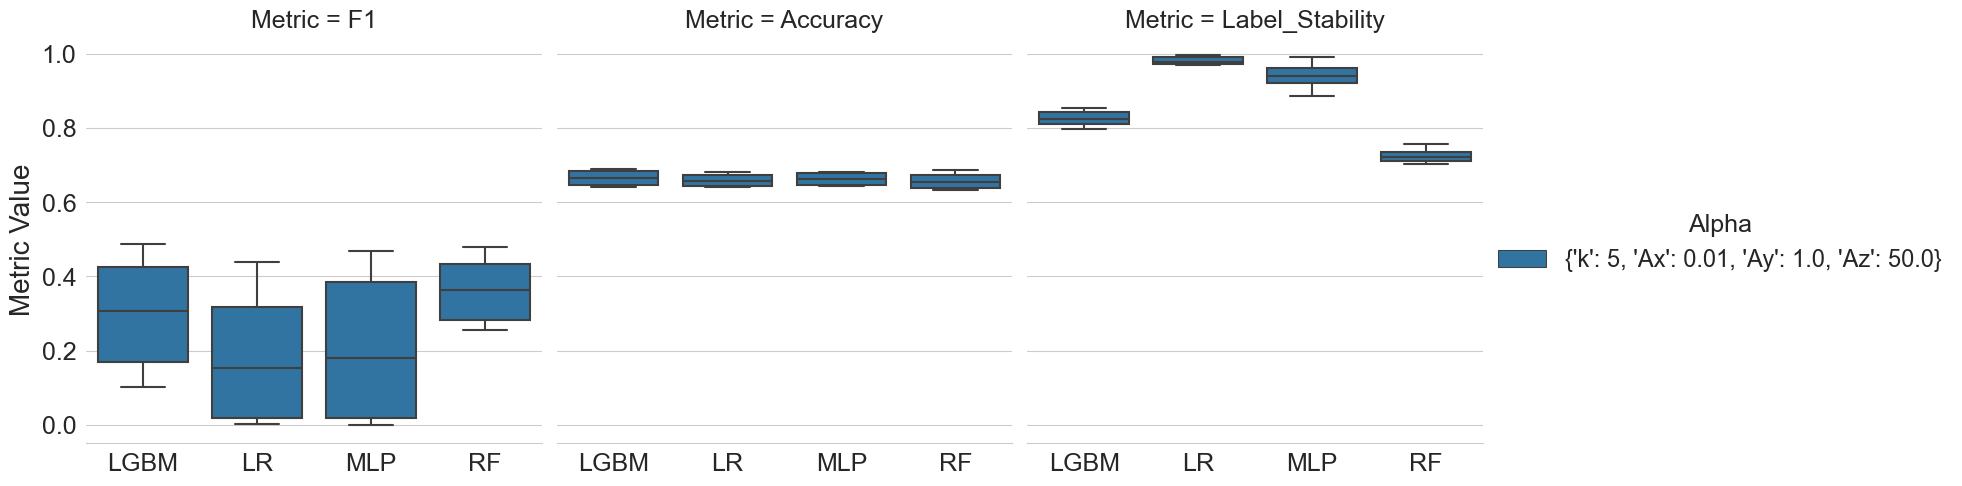

In [15]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           # ylim=(0.75, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

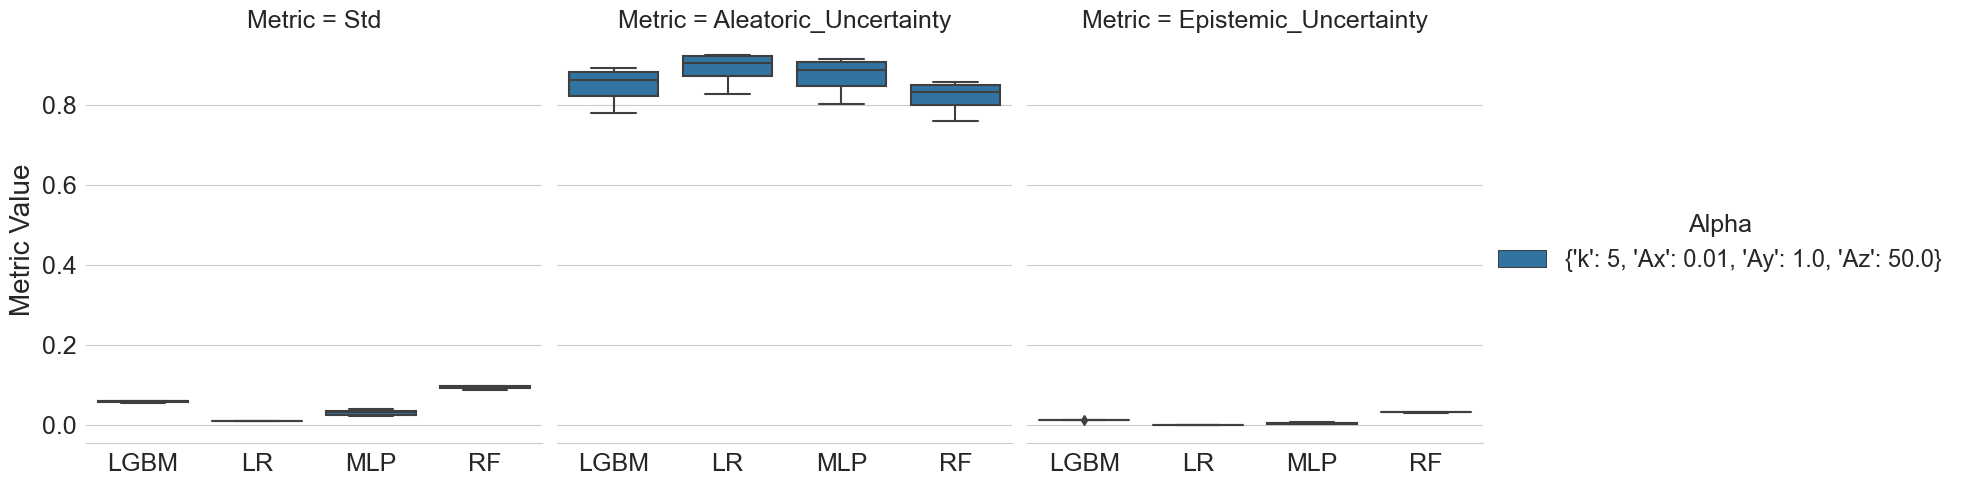

In [16]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           metric_names=['Std', 'Aleatoric_Uncertainty', 'Epistemic_Uncertainty'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 1200x600 with 0 Axes>

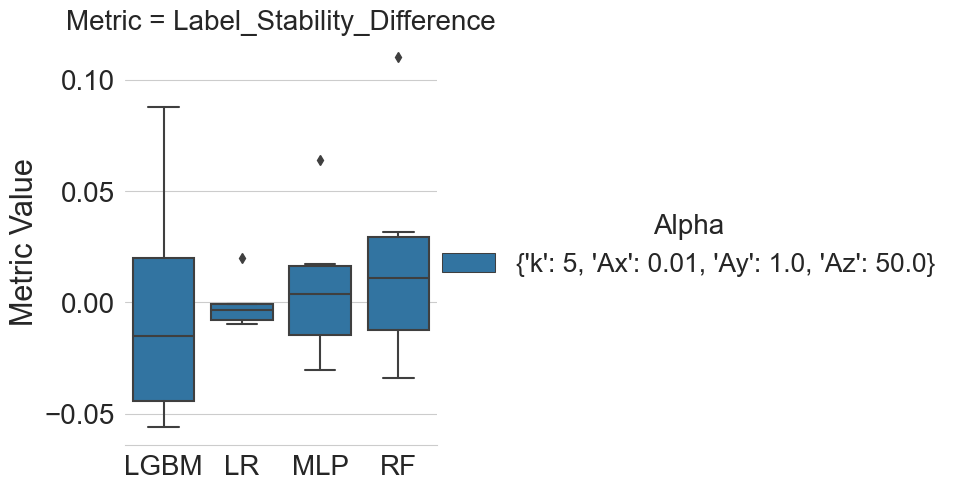

In [17]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group=SENSITIVE_ATTR_FOR_INTERVENTION,
                                           metric_names=['Label_Stability_Difference'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

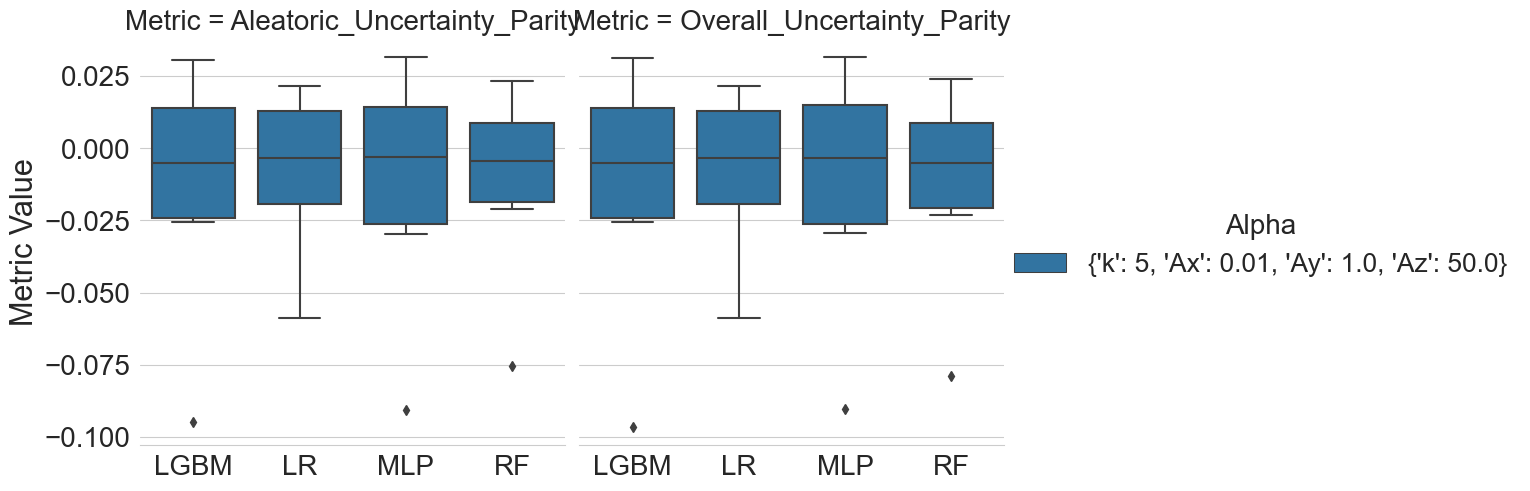

In [18]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group=SENSITIVE_ATTR_FOR_INTERVENTION,
                                           metric_names=['Aleatoric_Uncertainty_Parity',
                                                         'Overall_Uncertainty_Parity'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

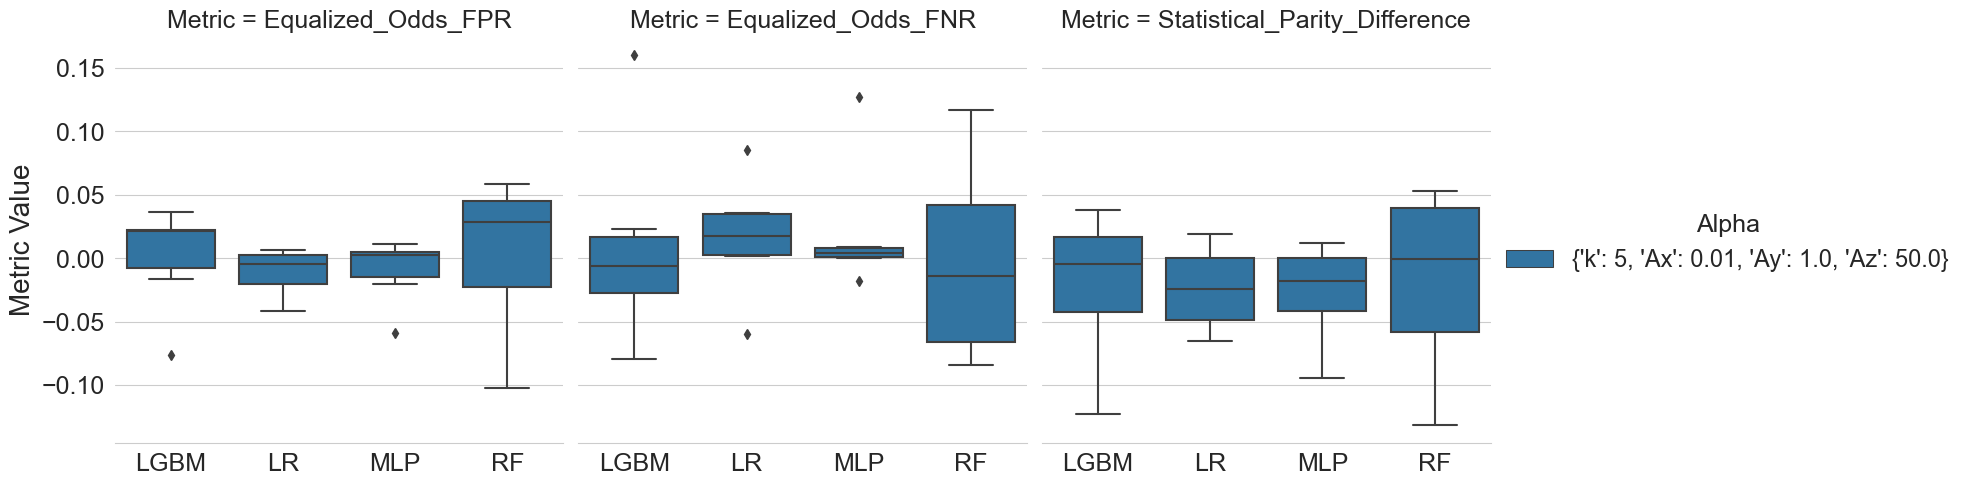

In [19]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group=SENSITIVE_ATTR_FOR_INTERVENTION,
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR', 'Statistical_Parity_Difference'],
                                           vals_to_replace=vals_to_replace)